# Entscheidungsbaum



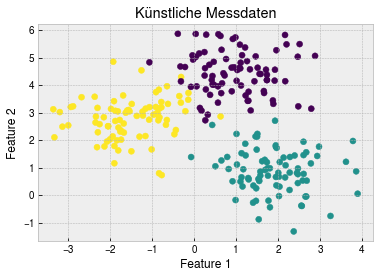

In [8]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=250, centers=3, random_state=0, cluster_std=0.8)

import matplotlib.pylab as plt; 
plt.style.use('bmh')
plt.rcParams['font.family'] = ['TeX Gyre Heros', 'sans-serif']

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Künstliche Messdaten');

Wir lassen Scikit-Learn einen Entscheidungsbaum erstellen. Dazu importieren wir
`DecisionTreeClassifier` aus dem Untermodul `sklearn.tree`. Danach trainieren
wir den Entscheidungsbaum mit `.fit()`.

In [9]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X,y);

Aber wie sieht denn jetzt die Prognose des Entscheidungsbaums aus? 

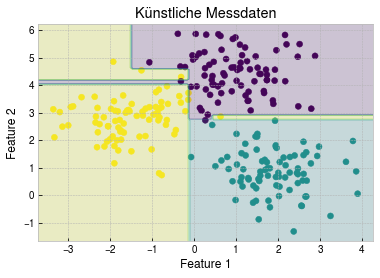

In [10]:
import numpy as np

xlim = ax.get_xlim()
ylim = ax.get_ylim()
X1_plot, X2_plot = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
X_plot = np.column_stack((X1_plot.ravel(), X2_plot.ravel()))
y_plot = model.predict(X_plot)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Künstliche Messdaten')
ax.contourf(X1_plot, X2_plot,y_plot.reshape(100,100), alpha=0.2);

Der blaue Streifen, der nach links ragt, und der gelbe Streifen, der nach rechts
ragt, passen nicht recht zu den Grenzen, die ein Mensche wohl gezogen hätte.
Entscheidungsbäume neigen sehr schnell zum Overfitting. Eine einfach
Möglichkeit, um das Overfitting zu reduzieren, ist die Tiefe des
Entscheidungsbaumes zu begrenzen. Das passiert mit dem optionalem Argument
`max_depth=`.  Wir setzen die maximale Tiefe erst auf den Wert 3, dann auf 4.

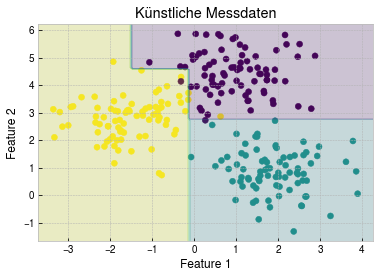

In [15]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X,y);
y_plot = model.predict(X_plot)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Künstliche Messdaten')
ax.contourf(X1_plot, X2_plot,y_plot.reshape(100,100), alpha=0.2);

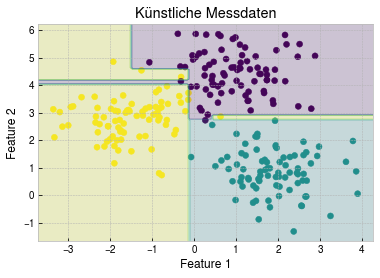

In [16]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X,y);
y_plot = model.predict(X_plot)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Künstliche Messdaten')
ax.contourf(X1_plot, X2_plot,y_plot.reshape(100,100), alpha=0.2);